In [2]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage.interpolation import rotate
import csv

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [18]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120_16 C RECONNECTION 12 FRAME\s0120_16 12 frame"

[WinError 2] The system cannot find the file specified: 'C:/Users/jdavies/Google Drive/MAGPIE/data/2016/s0120_16 C RECONNECTION 12 FRAME/s0120_16 12 frame'
C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME\s0125_16 12 frame


In [17]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)

    bk_fn=shot+" Background_0"+st+".png"
    bk_im=plt.imread(bk_fn) #read background image
    #bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

In [5]:
#normalise between images, assuming same brightness in background image
norms=[b_im[100:-100,100:-100].sum() for b_im in b]
n_max=max(norms)
nn=[n/n_max for n in norms]
s_n=[s_im[100:-100,100:-100]/n for s_im, n in zip(s, nn)] 

In [7]:
theta=24.5
s_r=[rotate(s_im, theta)for s_im in s_n]

<IPython.core.display.Javascript object>


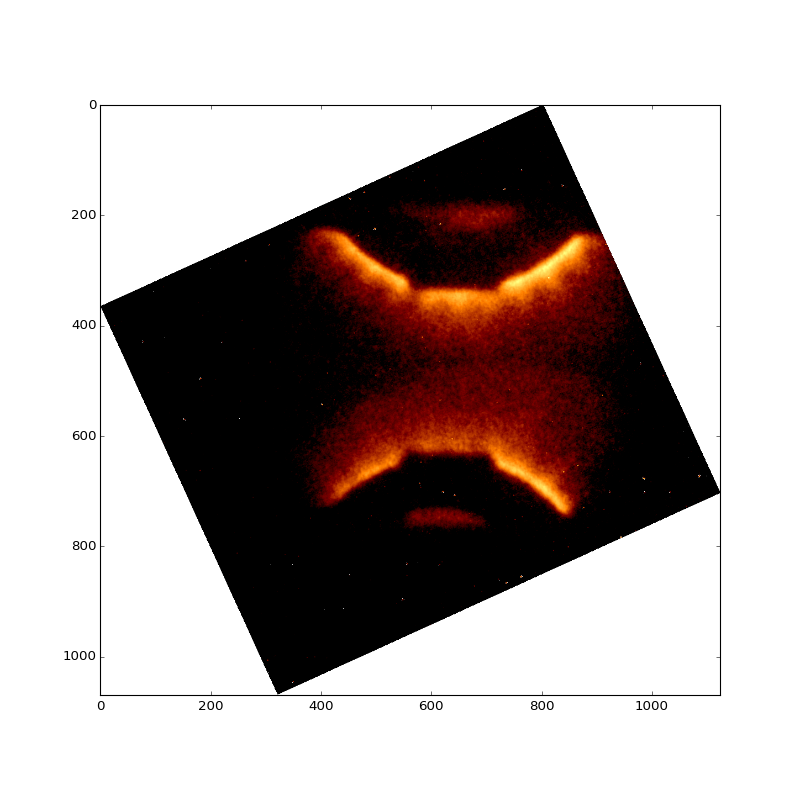

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [8]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(np.log(s_r[3]), cmap='afmhot', clim=[-4,1])

In [9]:
x0=510
y0=550
sl=[s_im[y0-30:y0+30, x0-400:x0+400].mean(axis=0) for s_im in s_r]
scale=29#280/9.0#px/mm
mm=sl[0].size/(2*scale)
x_mm=np.linspace(-mm, mm, sl[0].size)

<IPython.core.display.Javascript object>


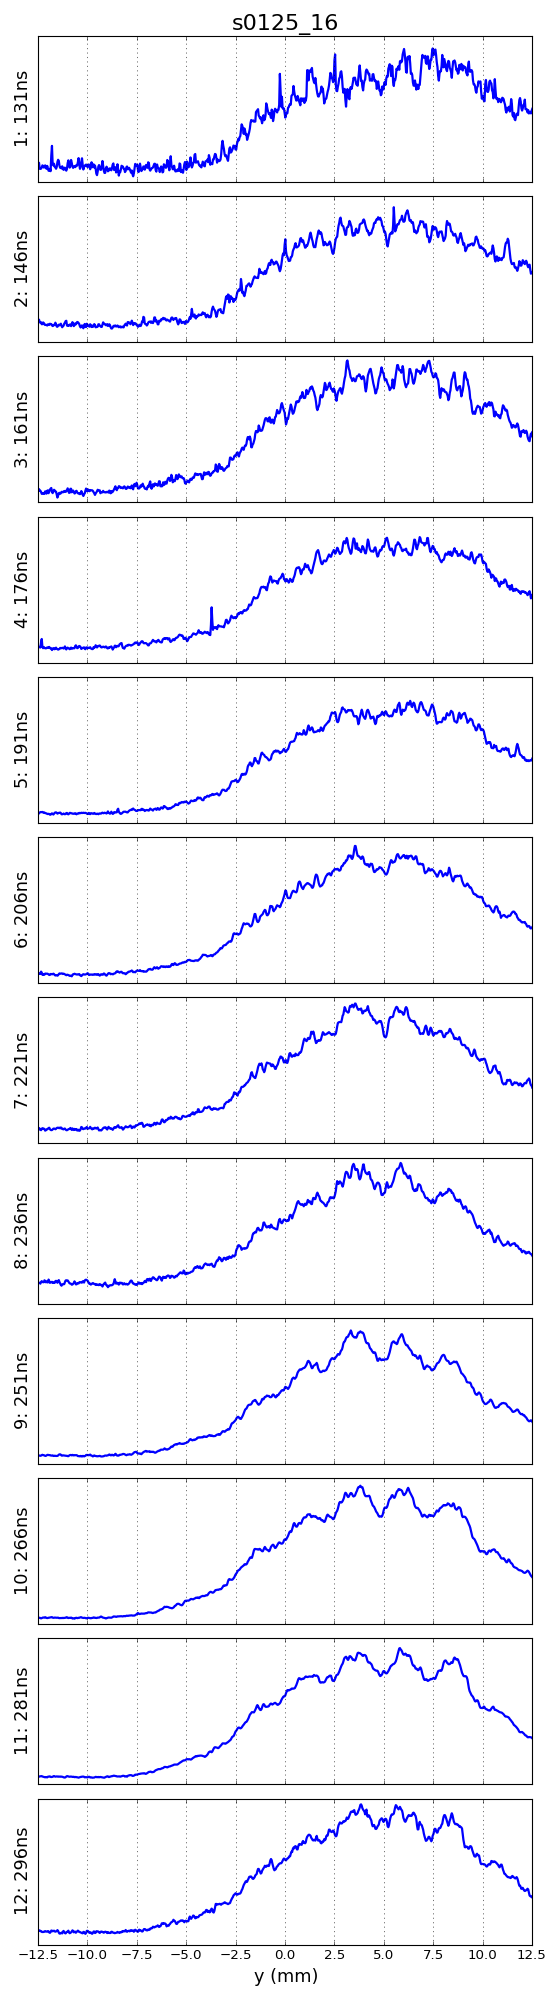

In [15]:
fig, ax=plt.subplots(12, 1, sharex=True,figsize=(7,25))
fig.subplots_adjust(hspace=0, wspace=0)

for ain,a in enumerate(ax):
    a.plot(x_mm,sl[ain], lw=2)
    a.axes.get_yaxis().set_ticks([])
    a.set_xticks(np.arange(-15,16,2.5))
    a.set_ylabel(str(ain+1)+': '+str(ain*15+131)+ 'ns', fontsize=16)
    a.grid(True, which='both')
    
ax[0].set_xlim(-12.5,12.5)
ax[11].set_xlabel('y (mm)', fontsize=16)
ax[11].tick_params(labelsize=12)
ax[0].set_title(shot, fontsize=20)
fig.tight_layout()

In [95]:
fig.savefig(shot+' plasmoid tracks.png', dpi=300)

## Load Plasmoid Location files

In [304]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0201B16 C RECONNECTION Gap v Wire\s0201B16 12 frame

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0201B16 C RECONNECTION Gap v Wire\s0201B16 12 frame


In [363]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
filename=shot+' plasmoid 1'
loc=[]
with open(filename+'.txt', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        frame=int(row[0])
        x=float(row[1])
        y=float(row[2])
        loc.append([y,x])

## Calculate displacement and speed

In [364]:
disp=np.diff(np.array(loc), axis=0)
vel=disp/(scale*20e-6)

In [365]:
dis=np.sqrt(disp[:,0]**2+disp[:,1]**2)
speed=np.sqrt(vel[:,0]**2+vel[:,1]**2)

In [366]:
speed

array([  41950.08641585,  162398.78399057,  158770.5439065 ])

In [367]:
vel/1e3

array([[  -6.89655172,   41.37931034],
       [ -10.34482759,  162.06896552],
       [   6.89655172,  158.62068966]])

In [290]:
disp

array([[ 17., -31.],
       [-11.,   8.],
       [ -9., -16.],
       [ -3., -67.],
       [ -3., -59.],
       [ -2., -71.]])